# Along Isopycnals

In [234]:
import xarray as xr
import numpy as np
import pandas as pd
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
from flox.xarray import xarray_reduce
import gsw

In [2]:
import os
os.chdir('/home.ufs/amf2288/argo-intern/funcs')
import density_funcs as df
import plot_funcs as pf

In [227]:
from importlib import reload
reload(df)
reload(pf)

<module 'plot_funcs' from '/home/amf2288/argo-intern/funcs/plot_funcs.py'>

In [5]:
# Set title size
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16  # Titles larger

# Set axis label size
plt.rcParams['axes.labelsize'] = 14  # Labels slightly smaller

# Data wrangling

## Create ds_binned

In [285]:
ds = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/new_test.nc', chunks={'N_PROF':10000})
ds = ds.assign_attrs({"Fetched_uri":''})
unique_prof = np.arange(len(ds['N_PROF']))
ds = ds.assign_coords(N_PROF=('N_PROF', unique_prof))

In [286]:
ds

<xarray.Dataset> Size: 123GB
Dimensions:            (PRES_INTERPOLATED: 1001, N_PROF: 2550896)
Coordinates:
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 8kB 0 2 4 6 ... 1996 1998 2000
    TIME               (N_PROF) datetime64[ns] 20MB dask.array<chunksize=(10000,), meta=np.ndarray>
    LATITUDE           (N_PROF) float64 20MB dask.array<chunksize=(10000,), meta=np.ndarray>
    LONGITUDE          (N_PROF) float64 20MB dask.array<chunksize=(10000,), meta=np.ndarray>
  * N_PROF             (N_PROF) int64 20MB 0 1 2 3 ... 2550893 2550894 2550895
Data variables:
    CT                 (N_PROF, PRES_INTERPOLATED) float64 20GB dask.array<chunksize=(10000, 1001), meta=np.ndarray>
    CYCLE_NUMBER       (N_PROF) int64 20MB dask.array<chunksize=(10000,), meta=np.ndarray>
    DATA_MODE          (N_PROF) <U1 10MB dask.array<chunksize=(10000,), meta=np.ndarray>
    DIRECTION          (N_PROF) <U1 10MB dask.array<chunksize=(10000,), meta=np.ndarray>
    PLATFORM_NUMBER    (N_PROF) int64 20MB dask.array<chunksize=(10000,), meta=np.ndarray>
    PRES               (N_PROF, PRES_INTERPOLATED) float32 10GB dask.array<chunksize=(10000, 1001), meta=np.ndarray>
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 10GB dask.array<chunksize=(10000, 1001), meta=np.ndarray>
    SA                 (N_PROF, PRES_INTERPOLATED) float64 20GB dask.array<chunksize=(10000, 1001), meta=np.ndarray>
    SIG0               (N_PROF, PRES_INTERPOLATED) float64 20GB dask.array<chunksize=(10000, 1001), meta=np.ndarray>
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 10GB dask.array<chunksize=(10000, 1001), meta=np.ndarray>
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 10GB dask.array<chunksize=(10000, 1001), meta=np.ndarray>
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 20GB dask.array<chunksize=(10000, 1001), meta=np.ndarray>
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://data-argo.ifremer.fr
    Fetched_by:           amf2288
    Fetched_date:         2025/03/11
    Fetched_constraints:  [x=0.00/5.00; y=40.00/45.00; z=0.0/2002.0]
    Fetched_uri:          
    Valid uris:           ['https://data-argo.ifremer.fr/dac/coriolis/6903068...
    All uris:             ['https://data-argo.ifremer.fr/dac/coriolis/6903068...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_29835/218986346.py:26: SyntaxWarning: invalid escape sequence '\c'
  ax2.set_title('All Argo Profiles, $1^\circ$ x $1^\circ$ bins')


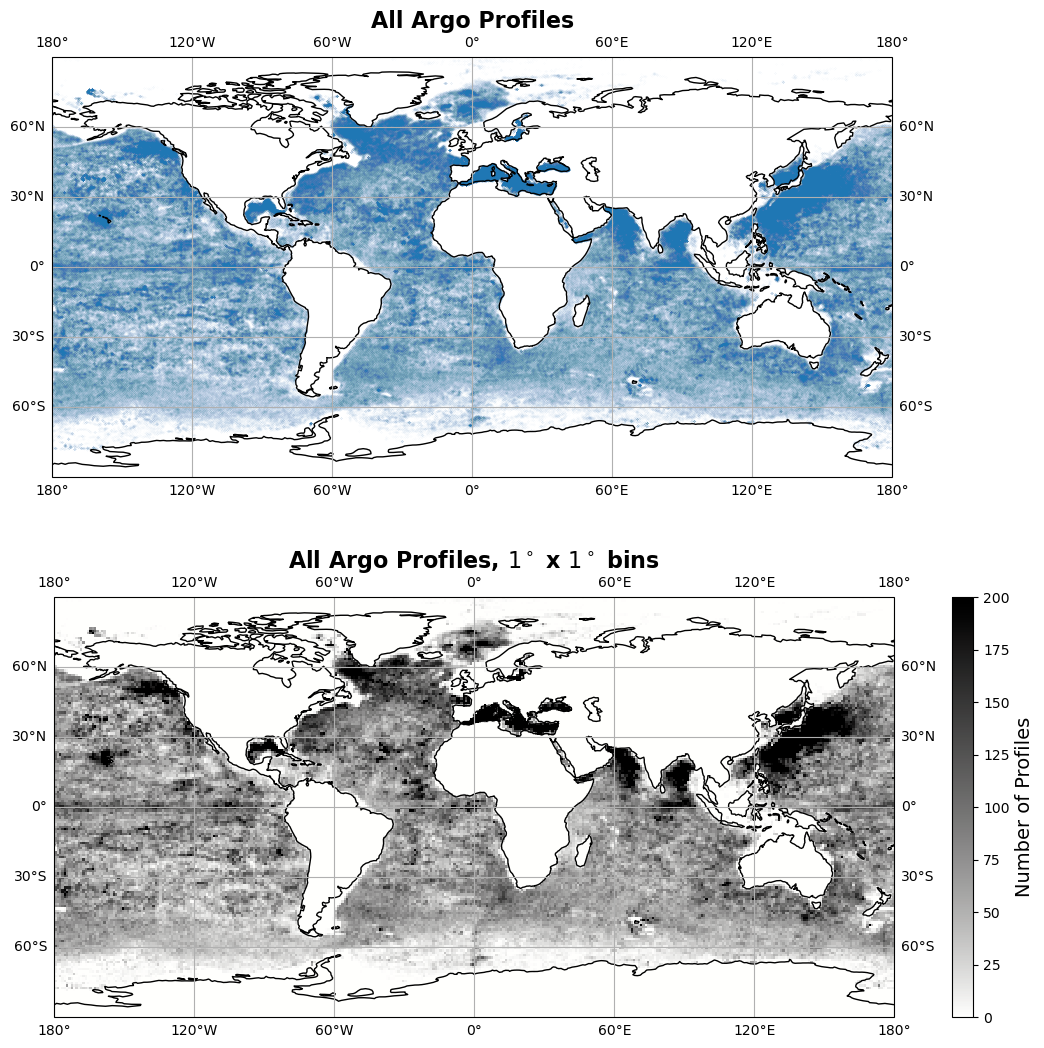

In [264]:
fig=plt.figure(figsize=(15,12))
ax1 = plt.subplot(211,projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(draw_labels=True)
ax1.set_global()
ax1.scatter(ds.LONGITUDE,ds.LATITUDE,transform=ccrs.PlateCarree(),color='tab:blue',s=0.0001)
ax1.set_title('All Argo Profiles');

ax2 = plt.subplot(212,projection=ccrs.PlateCarree())
lon_edges = np.arange(-180, 181, 1)
lat_edges = np.arange(-90, 91, 1)
heatmap, _, _ = np.histogram2d(ds.LATITUDE.values, ds.LONGITUDE.values, bins=[lat_edges, lon_edges])
lon_centers = (lon_edges[:-1] + lon_edges[1:]) / 2
lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2
X, Y = np.meshgrid(lon_centers, lat_centers)
start = 0
end   = 200
norm  = colors.Normalize(vmin=start, vmax=end)
cmap  = cmo.gray_r
heatmap_plot = ax2.pcolormesh(X, Y, heatmap, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
cbar = plt.colorbar(heatmap_plot, ax=ax2, orientation='vertical')#, shrink=0.5)
cbar.set_label('Number of Profiles')
ax2.coastlines()
ax2.gridlines(draw_labels=True)
ax2.set_global()
ax2.set_title('All Argo Profiles, $1^\circ$ x $1^\circ$ bins')

pos1 = ax1.get_position()
ax1.set_position([pos1.x0 - 0.049, pos1.y0+0.03, pos1.width, pos1.height])

In [7]:
lon_bins = np.arange(-180,181,1)
lat_bins = np.arange(-90,91,1)

In [8]:
numeric_vars = [var for var in ds if np.issubdtype(ds[var].dtype, np.number)]
ds = ds[numeric_vars]

In [9]:
def get_ds_binned(ds, lon_bins, lat_bins):
    
    ds_binned = xarray_reduce(
    ds,
    'LONGITUDE',
    'LATITUDE',
    func='mean',
    expected_groups=(
        pd.IntervalIndex.from_breaks(lon_bins),
        pd.IntervalIndex.from_breaks(lat_bins)
    ),
    fill_value=np.nan,
    skipna=True)
    
    lon_l = np.arange(lon_bins[0],lon_bins[-1],1)
    lon_r = np.arange(lon_bins[1],lon_bins[-1]+1,1)
    lon_c = (lon_l + lon_r)/2

    lat_l = np.arange(lat_bins[0],lat_bins[-1],1)
    lat_r = np.arange(lat_bins[1],lat_bins[-1]+1,1)
    lat_c = (lat_l + lat_r)/2

    ds_binned = ds_binned.assign_coords({
        "lat_c": ("LATITUDE_bins", lat_c),
        "lat_l": ("LATITUDE_bins", lat_l),
        "lat_r": ("LATITUDE_bins", lat_r),
        "lon_c": ("LONGITUDE_bins", lon_c),
        "lon_l": ("LONGITUDE_bins", lon_l),
        "lon_r": ("LONGITUDE_bins", lon_r),
    })
    
    ds_binned = ds_binned.swap_dims({"LATITUDE_bins": "lat_c", "LONGITUDE_bins": "lon_c"})
    ds_binned = ds_binned.drop_vars(["LATITUDE_bins", "LONGITUDE_bins"])
    
    if isinstance(ds_binned, xr.Dataset):
        # For xarray.Dataset, use rename_dims and rename_vars
        ds_binned = ds_binned.rename_dims({"PRES_INTERPOLATED": "z_c"}).rename_vars({"PRES_INTERPOLATED": "z_c"})
    elif isinstance(ds_binned, xr.DataArray):
        # For xarray.DataArray, use rename to rename the dimension
        ds_binned = ds_binned.rename({"PRES_INTERPOLATED": "z_c"})
    else:
        raise TypeError("Input must be an xarray.Dataset or xarray.DataArray")

    
    return ds_binned

In [10]:
ds_binned = get_ds_binned(ds, lon_bins, lat_bins)

In [11]:
%%time
ds_binned = ds_binned.chunk({'z_c':20}).load()

CPU times: user 1h 45min 37s, sys: 7h 28s, total: 8h 46min 6s
Wall time: 35min 16s


In [20]:
ds_binned.to_netcdf('/swot/SUM05/amf2288/sync-boxes/globe_binned_z.nc')

## Load ds_binned and plot

In [21]:
ds_binned = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/globe_binned_z.nc', chunks={'z_c':20}).load()

In [251]:
depth = 1000
ds_sel = ds_binned.sel(z_c=depth, method='nearest').compute()

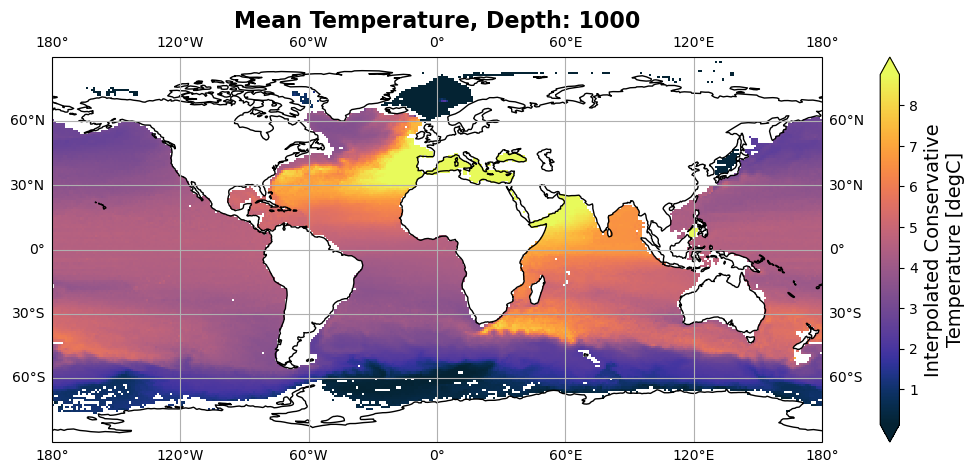

In [252]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_sel.CT.plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.thermal, robust=True)
ax.set_title('Mean Temperature, Depth: {}'.format(depth));

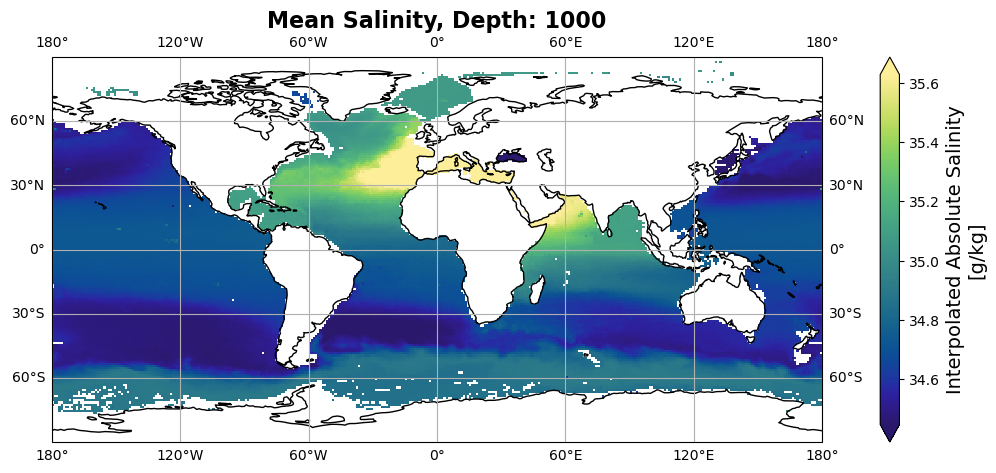

In [253]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_sel.SA.plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.haline, robust=True)
ax.set_title('Mean Salinity, Depth: {}'.format(depth));

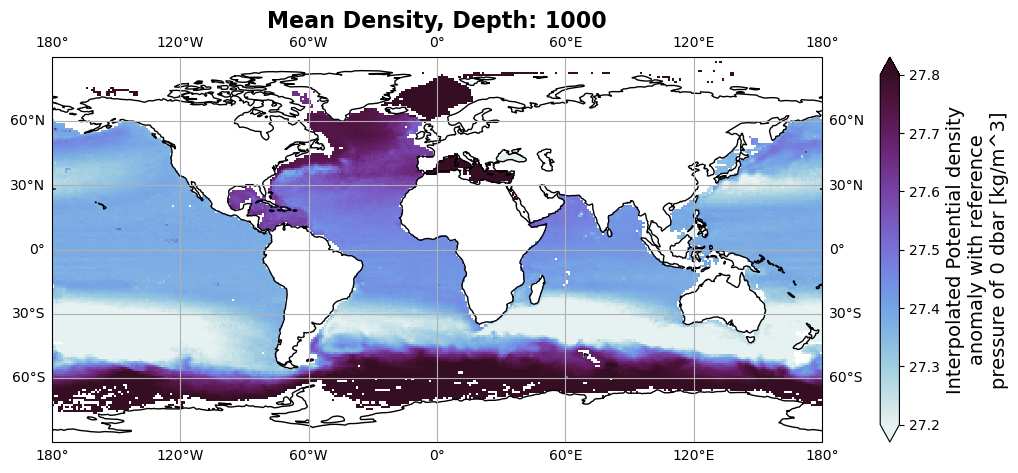

In [263]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_sel.SIG0.plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.dense, vmin=27.2, vmax=27.8)
ax.set_title('Mean Density, Depth: {}'.format(depth));

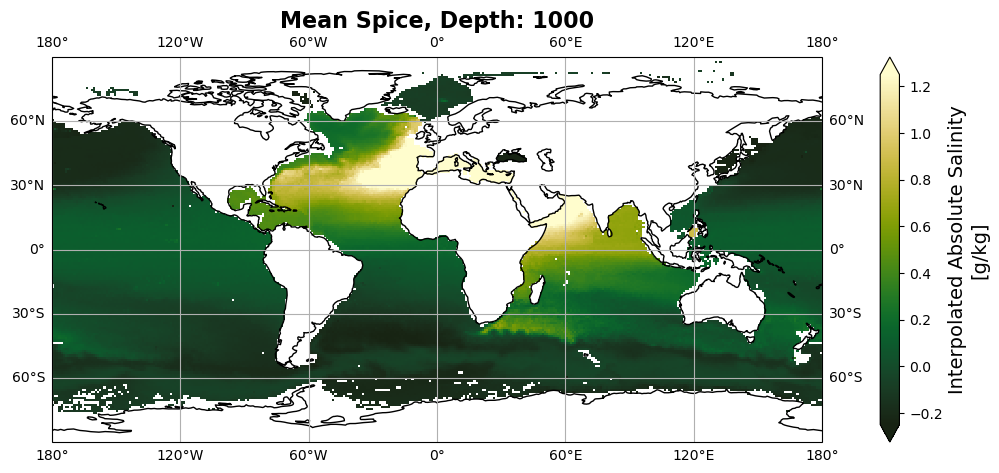

In [261]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_sel.SPICE.plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.speed_r, vmin=-0.25, vmax=1.25)
ax.set_title('Mean Spice, Depth: {}'.format(depth));

## Create ds_rho

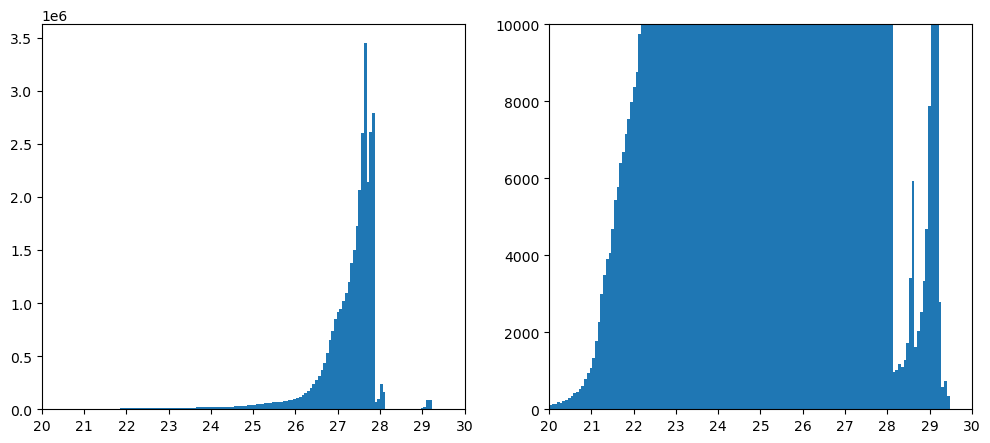

In [76]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.hist(ds_binned.SIG0.values.flatten(), bins=500)
plt.xlim(20,30)
plt.xticks(ticks=np.arange(20,31,1),labels=np.arange(20,31,1));

plt.subplot(122)
plt.hist(ds_binned.SIG0.values.flatten(), bins=500)
plt.xlim(20,30)
plt.ylim(0,1e4)
plt.xticks(ticks=np.arange(20,31,1),labels=np.arange(20,31,1));

In [77]:
rho_grid = np.arange(21,29,0.0025)

In [78]:
len(rho_grid)

3200

In [81]:
%%time
ds_binned = ds_binned.chunk({"lon_c": 20, "lat_c": 20, "z_c":1001}).load()

CPU times: user 7.04 s, sys: 3.67 s, total: 10.7 s
Wall time: 10.7 s


In [84]:
%%time
ds_rho = df.density_interp_binned(ds_binned, rho_grid)

z_c concat complete
CT concat complete
SA concat complete
SIG0 concat complete
SPICE concat complete
ds_rho merge complete
CPU times: user 1h 53min 16s, sys: 1min 43s, total: 1h 54min 59s
Wall time: 1h 54min 58s


In [85]:
ds_rho

<xarray.Dataset> Size: 8GB
Dimensions:   (rho_grid: 3200, lon_c: 360, lat_c: 180)
Coordinates:
  * rho_grid  (rho_grid) float64 26kB 21.0 21.0 21.01 21.01 ... 28.99 29.0 29.0
  * lon_c     (lon_c) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat_c     (lat_c) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Data variables:
    z_c       (rho_grid, lon_c, lat_c) float64 2GB nan nan nan ... nan nan nan
    CT        (rho_grid, lon_c, lat_c) float64 2GB nan nan nan ... nan nan nan
    SA        (rho_grid, lon_c, lat_c) float64 2GB nan nan nan ... nan nan nan
    SIG0      (rho_grid, lon_c, lat_c) float64 2GB nan nan nan ... nan nan nan
    SPICE     (rho_grid, lon_c, lat_c) float64 2GB nan nan nan ... nan nan nan

In [111]:
ds_rho = ds_rho.rename({'rho_grid':'density'})

In [113]:
ds_rho.to_netcdf('/swot/SUM05/amf2288/sync-boxes/globe_binned_rho.nc')

## Load ds_rho and plot

In [116]:
ds_rho = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/globe_binned_rho.nc', chunks={'density':50})

In [175]:
density = 27.5

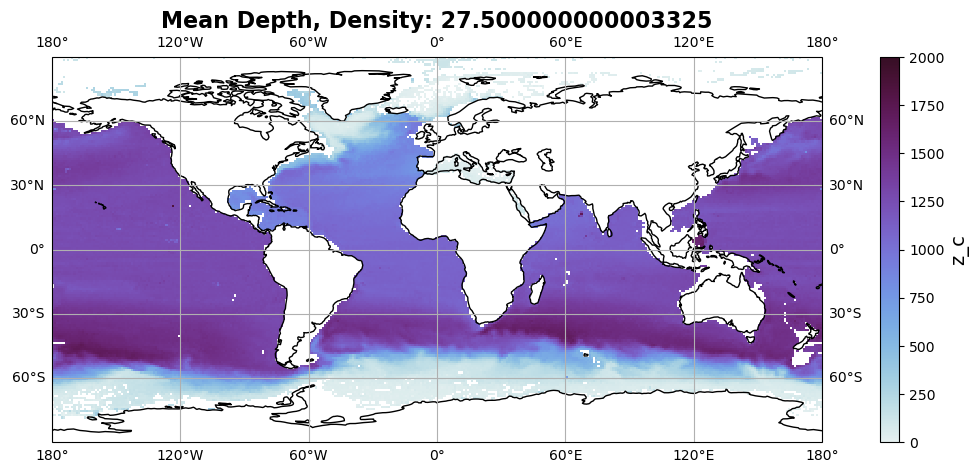

In [266]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_rho.sel(density=density, method='nearest').z_c.plot(x='lon_c', y='lat_c', ax=ax, transform=ccrs.PlateCarree(), cmap=cmo.dense, vmin=0, vmax=2000)
ax.set_title('Mean Depth, Density: {}'.format(ds_rho.sel(density=density, method='nearest').density.values));

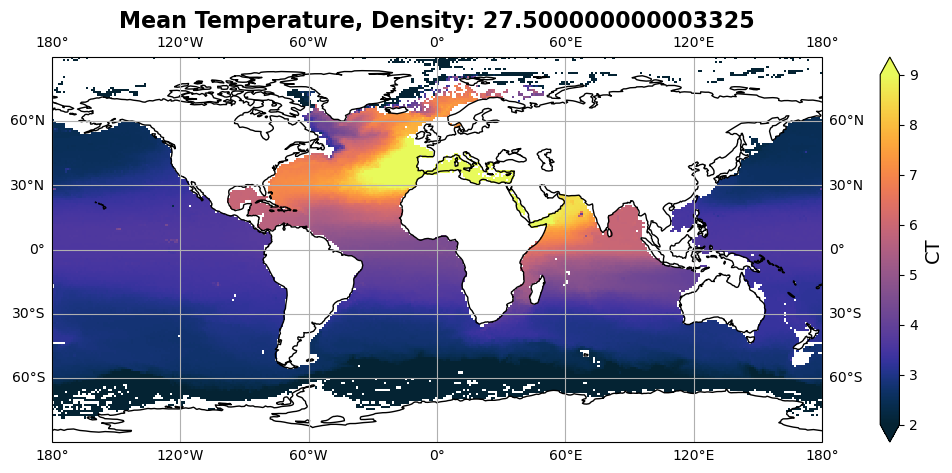

In [190]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_rho.sel(density=density, method='nearest').CT.plot(x='lon_c', y='lat_c', ax=ax, transform=ccrs.PlateCarree(), cmap=cmo.thermal, vmin=2, vmax=9)
ax.set_title('Mean Temperature, Density: {}'.format(ds_rho.sel(density=density, method='nearest').density.values));

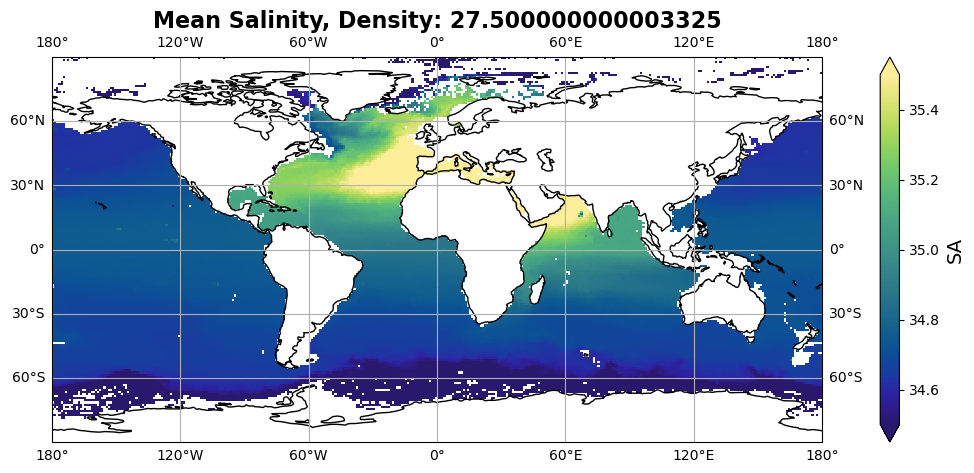

In [188]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_rho.sel(density=density, method='nearest').SA.plot(x='lon_c', y='lat_c', ax=ax, transform=ccrs.PlateCarree(), cmap=cmo.haline, vmin=34.5, vmax=35.5) 
ax.set_title('Mean Salinity, Density: {}'.format(ds_rho.sel(density=density, method='nearest').density.values));

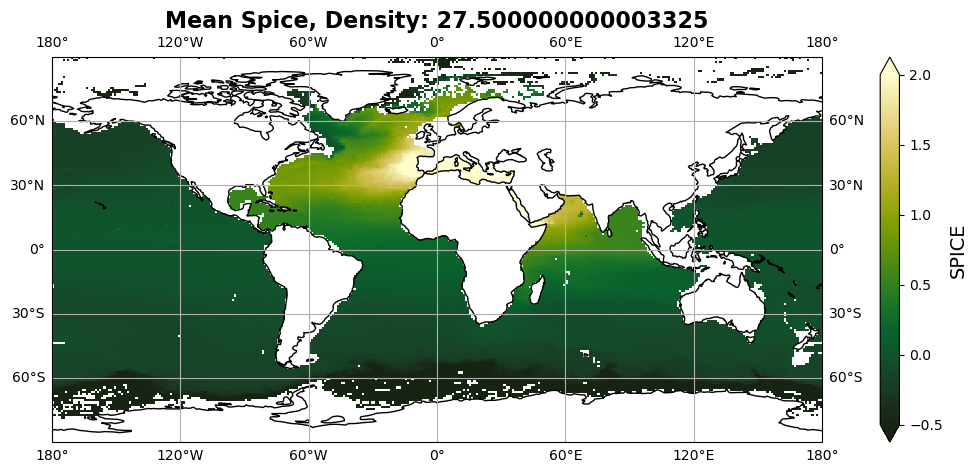

In [198]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_rho.sel(density=density, method='nearest').SPICE.plot(x='lon_c', y='lat_c', ax=ax, transform=ccrs.PlateCarree(), cmap=cmo.speed_r, vmin=-0.5, vmax=2)
ax.set_title('Mean Spice, Density: {}'.format(ds_rho.sel(density=density, method='nearest').density.values));

# Calculate Lateral Gradeints

In [142]:
dCT_dx = ds_rho.CT.differentiate('lon_c').compute()
dCT_dy = ds_rho.CT.differentiate('lat_c').compute()

In [143]:
dSA_dx = ds_rho.SA.differentiate('lon_c').compute()
dSA_dy = ds_rho.SA.differentiate('lat_c').compute()

In [144]:
dSPICE_dx = ds_rho.SPICE.differentiate('lon_c').compute()
dSPICE_dy = ds_rho.SPICE.differentiate('lat_c').compute()

In [171]:
density = 27.5

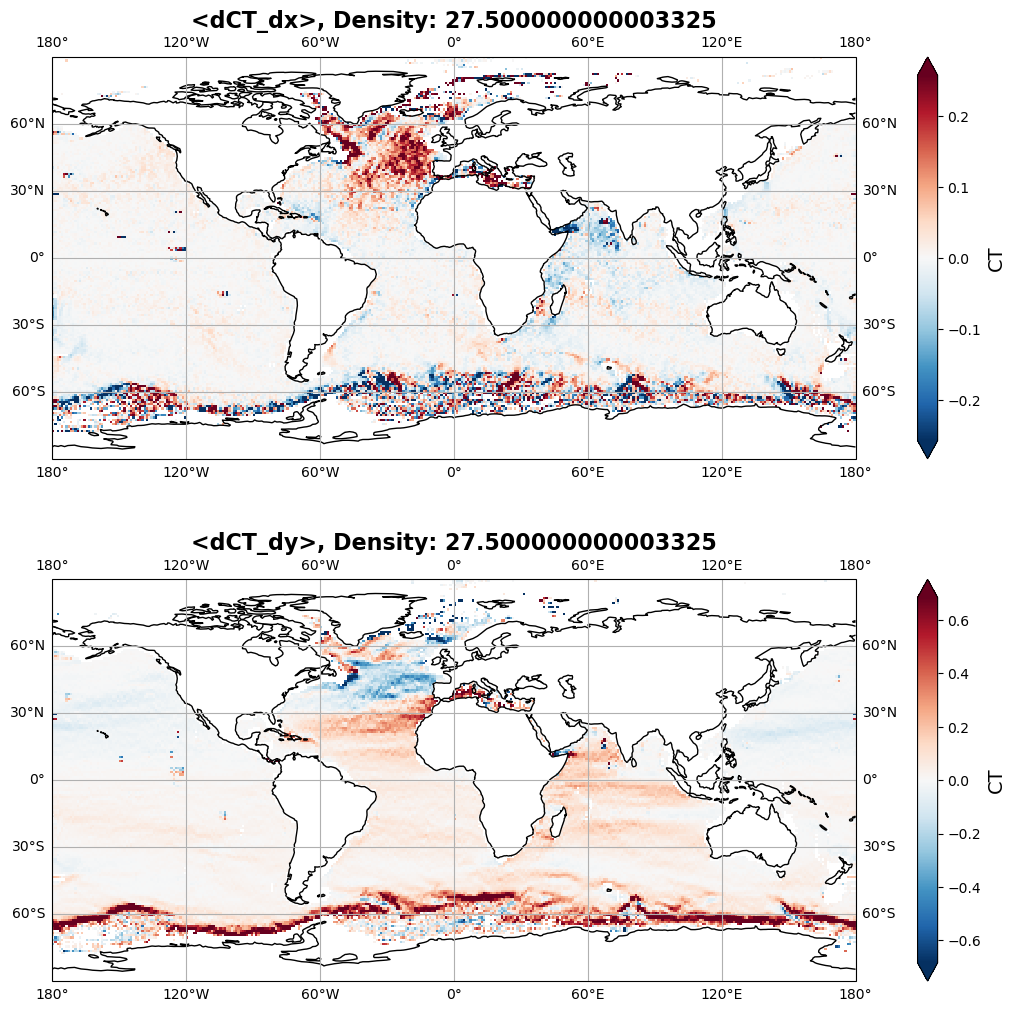

In [248]:
fig=plt.figure(figsize=(16,12))
ax1 = plt.subplot(211, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(draw_labels=True)
ax1.set_global()
dCT_dx.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax1,transform=ccrs.PlateCarree(), robust=True)
ax1.set_title('<dCT_dx>, Density: {}'.format(dCT_dx.sel(density=density, method='nearest').density.values))

ax2 = plt.subplot(212, projection=ccrs.PlateCarree())
ax2.coastlines()
ax2.gridlines(draw_labels=True)
ax2.set_global()
dCT_dy.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax2,transform=ccrs.PlateCarree(), robust=True)
ax2.set_title('<dCT_dy>, Density: {}'.format(dCT_dx.sel(density=density, method='nearest').density.values))

plt.subplots_adjust(hspace=0.3)

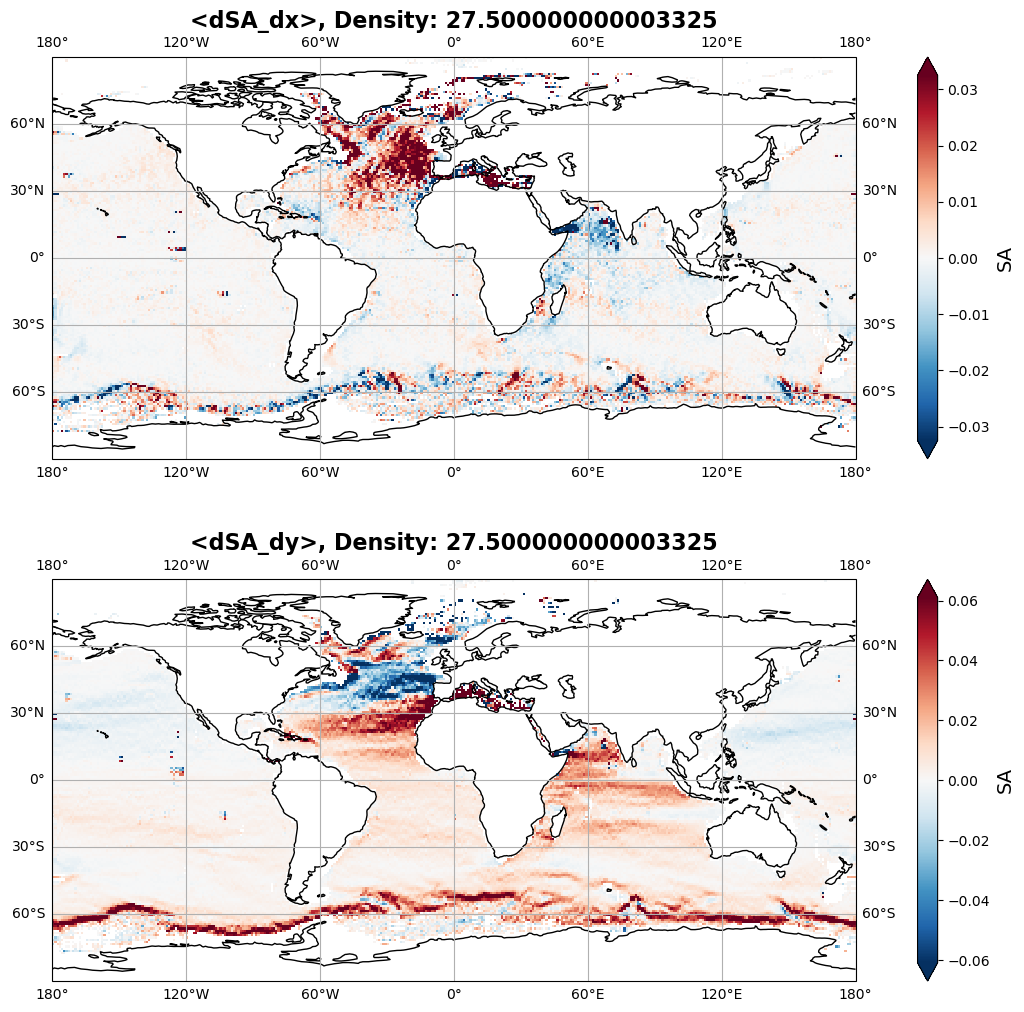

In [249]:
fig=plt.figure(figsize=(16,12))
ax1 = plt.subplot(211, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(draw_labels=True)
ax1.set_global()
dSA_dx.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax1,transform=ccrs.PlateCarree(), robust=True)
ax1.set_title('<dSA_dx>, Density: {}'.format(dCT_dx.sel(density=density, method='nearest').density.values))

ax2 = plt.subplot(212, projection=ccrs.PlateCarree())
ax2.coastlines()
ax2.gridlines(draw_labels=True)
ax2.set_global()
dSA_dy.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax2,transform=ccrs.PlateCarree(), robust=True)
ax2.set_title('<dSA_dy>, Density: {}'.format(dCT_dx.sel(density=density, method='nearest').density.values))

plt.subplots_adjust(hspace=0.3)

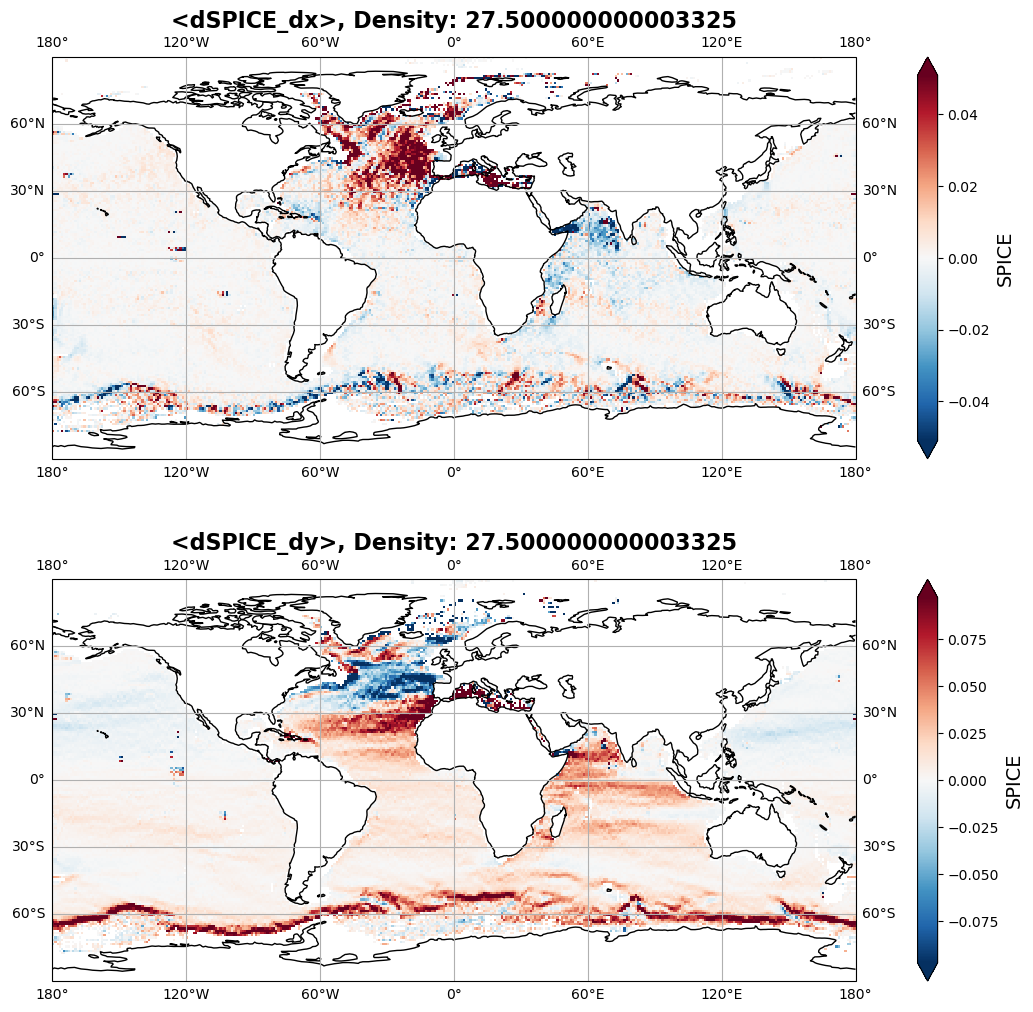

In [250]:
fig=plt.figure(figsize=(16,12))
ax1 = plt.subplot(211, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(draw_labels=True)
ax1.set_global()
dSPICE_dx.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax1,transform=ccrs.PlateCarree(), robust=True)
ax1.set_title('<dSPICE_dx>, Density: {}'.format(dCT_dx.sel(density=density, method='nearest').density.values))

ax2 = plt.subplot(212, projection=ccrs.PlateCarree())
ax2.coastlines()
ax2.gridlines(draw_labels=True)
ax2.set_global()
dSPICE_dy.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax2,transform=ccrs.PlateCarree(), robust=True)
ax2.set_title('<dSPICE_dy>, Density: {}'.format(dCT_dx.sel(density=density, method='nearest').density.values))

plt.subplots_adjust(hspace=0.3)

# Calculate DSC

In [317]:
def calculate_DSC(ds):
    alpha = gsw.alpha(ds.SA, ds.CT, ds.z_c)
    theta_sig_sig = ds.CT.differentiate(coord='density').differentiate(coord='density')
    
    DSC = 2*alpha*ds.SIG0*theta_sig_sig
    
    ds['DSC'] = (['density', 'lon_c', 'lat_c'], DSC.data)

    return ds

In [318]:
ds_rho = calculate_DSC(ds_rho).compute()

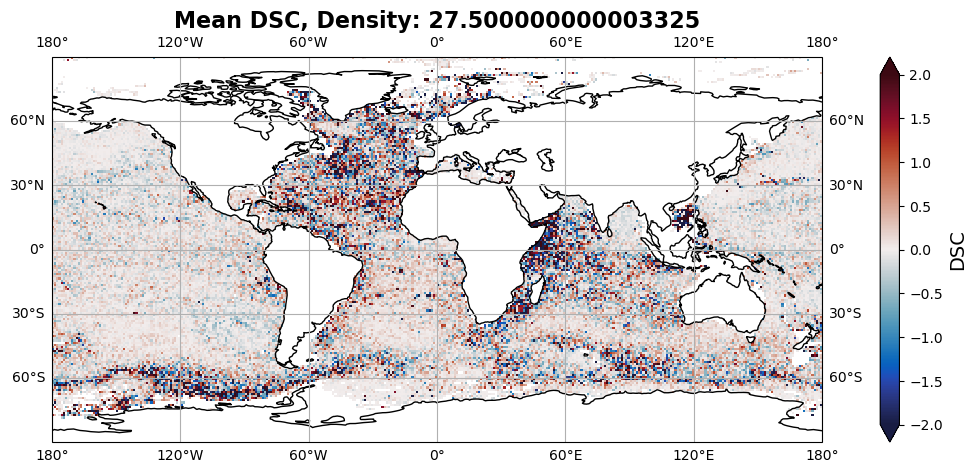

In [319]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_rho.sel(density=density, method='nearest').DSC.plot(x='lon_c', y='lat_c', ax=ax, transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap=cmo.balance)
ax.set_title('Mean DSC, Density: {}'.format(ds_rho.sel(density=density, method='nearest').density.values));

# Calculate Stability

In [268]:
N2, pmid = gsw.stability.Nsquared(ds_binned.SA, ds_binned.CT, ds_binned.PRES)

In [272]:
Tu, Rrho, pmid = gsw.stability.Turner_Rsubrho(ds_binned.SA, ds_binned.CT, ds_binned.PRES)

In [281]:
new_depth = np.full((1, 360, 180), np.nan)
N2_expand = np.concatenate([N2, new_depth], axis=0)
Tu_expand = np.concatenate([Tu, new_depth], axis=0)

In [288]:
ds_binned['N2'] = (['z_c', 'lon_c', 'lat_c'], N2_expand)
ds_binned['Tu'] = (['z_c', 'lon_c', 'lat_c'], Tu_expand)

Text(0.5, 1.0, 'Mean N2, Depth: 1000')

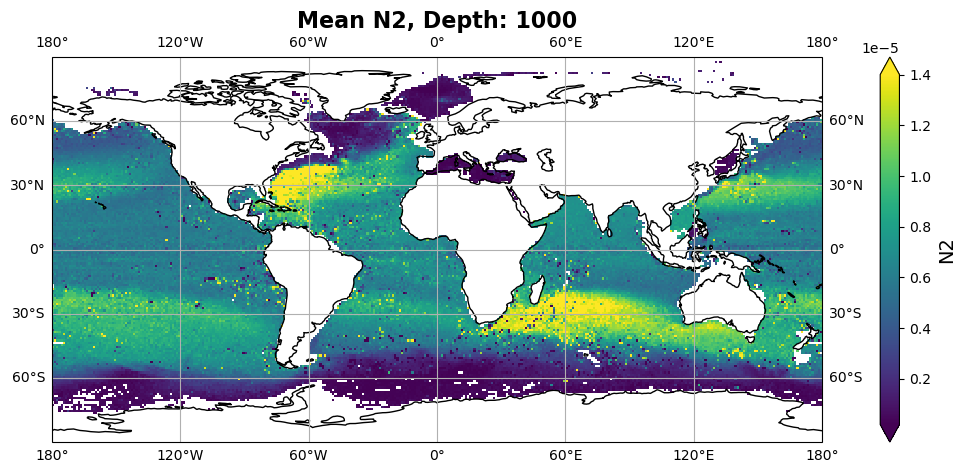

In [332]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_binned.sel(z_c=depth, method='nearest').N2.plot(x='lon_c', y='lat_c', ax=ax, transform=ccrs.PlateCarree(), robust=True)
ax.set_title('Mean N2, Depth: {}'.format(depth))

In [322]:
bounds = [-100, -90, -45, 45, 90, 100]
norm = colors.BoundaryNorm(bounds, cmap.N)

Text(0.5, 1.0, 'Mean Tu, Depth: 1000')

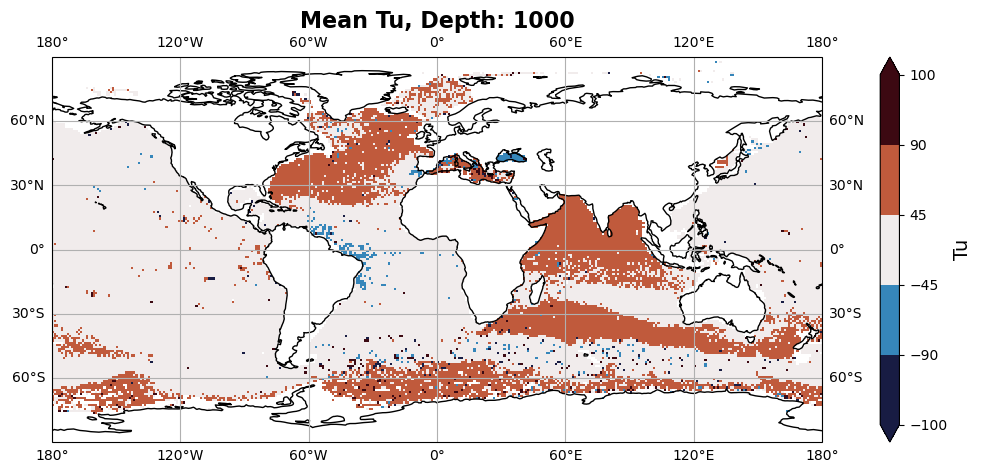

In [331]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_binned.sel(z_c=depth, method='nearest').Tu.plot(x='lon_c', y='lat_c', ax=ax, transform=ccrs.PlateCarree(), cmap=cmo.balance, norm=norm)
ax.set_title('Mean Tu, Depth: {}'.format(depth))